# Just Plot It

> _never show statistics without a picture; never show a picture without statistics_. 

In the world of analytics, data visualizations exist to make data more understandable and in such a way that descriptive statistics alone cannot.

However, I come across more bad examples of visualizations than good, even given the energy and investment spent across industries in data-driven decision making. There are some popular blogs (e.g. [Junk Charts](http://junkcharts.typepad.com/junk_charts/) and [Visual Business Intelligence](http://www.perceptualedge.com/blog/)) that focus on data visualization, providing fantastic examples of what not to do (along with supporting explanations), and they have a seemingly endless supply of material to discuss.

As I write this I am reminded of a more famous quote by [Richard Hamming](http://en.wikipedia.org/wiki/Richard_Hamming): _The purpose of computing is insight, not numbers_. Getting insight from visualizations can be hard, but following some ground rules goes a long way, and I'll cover two such rules here. 

## Rule #1 - Don't forget that humans _perceive_

[William S. Cleveland](http://www.stat.purdue.edu/~wsc/) has done a fair bit of research studying how people perceive visual information displayed in charts and diagrams. Most of this came out of [his work while at Bell Labs](http://stat.bell-labs.com/wsc/). (I am constantly blown away by how much foundational statistical computing work has come out of Bell Labs. Non-statistical advancements too: recently I have been dealing with some ASCII-to-Unicode text parsing issues and learned that the [UTF-8](http://en.wikipedia.org/wiki/UTF-8) encoding used in half the world's web pages came out of, you guessed it, Bell Labs.)

Cleveland's contemporary [Edward Tufte](http://en.wikipedia.org/wiki/Edward_Tufte) has published a series of very popular books on visualization that infuse philosophy and historical narrative; Cleveland on the other hand, has brought a lot of scientific rigor to the topic and focuses on the context of statistical analysis. His book [_The Elements of Graphing Data_](http://www.amazon.com/Elements-Graphing-Data-William-Cleveland/dp/0963488414) [1] should be on every analytics professional's shelf. 

Prior to publishing [1] [Cleveland published a short paper with Robert McGill](http://elibrary.unm.edu/courses/documents/ClevelandandMcGill1985-GraphicalPerceptionandGraphicalMethodsforAnalyzingScientificData.pdf) covering how people are able to make judgments based on data presented in various ways. For example, they found that information displayed using the area and color of shapes was harder to understand than the same information presented with more basic elements like lines, which have lengths and slopes. So, seemingly benign stylistic choices can adversely affect our ability to perceive patterns in the data. Often, simpler is better.


## Rule #2 – Choose graphic layouts to aid perception

Because line lengths and slopes matter, the "window frame" in which these lines are plotted must be taken into consideration. These plotting windows can be characterized by their aspect ratio, which is the ratio of the length of the window to its height. The basic idea is that one cannot simply shove any data set into a fixed plotting window without hurting our ability to perceive relationships in these data. This issue is especially relevant nowadays, where visualizations are increasingly seen on the web or in dashboards. In these contexts, the plotting window sizes are often chosen solely on screen real estate and layout constraints, rather than for optimal perception by the intended audience (this is especially problematic when [presenting technical information in PowerPoint](http://norvig.com/Gettysburg/making.html)).

In the following section, I am going to explore a particular, fantastic and classic visualization example involving [sunspot data](http://en.wikipedia.org/wiki/Sunspot) and the aspect ratio of plotting windows. Using this data to highlight the aspect ratio issue provides a nice vignette of:

* how the simplest visualization task still requires careful thought
* how to quickly explore data

I'll dive into the sunspot data and plotting it with different aspect ratios, and I'll show this vignette through using a new tool for interactive, collaborative analytical work that I have been looking for an excuse to play with.

## Getting started


OK, let's just dive right in and fill in details as we go. I'll be using Python for this exploration but will focus on the story and not the code. 

First things first, let's load the sunspots data, which is easy to find (e.g. [from NOAA](ftp://ftp.ngdc.noaa.gov/STP/SOLAR_DATA/SUNSPOT_NUMBERS/)) and conveniently included in a popular Python package for doing statistical work... 

In [1]:
!sudo pip install -U statsmodels

sudo: unable to resolve host ip-172-30-2-228
The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
Requirement already up-to-date: statsmodels in /usr/local/lib/python3.5/dist-packages (0.9.0)
Requirement not upgraded as not directly required: patsy in /usr/local/lib/python3.5/dist-packages (from statsmodels) (0.5.0)
Requirement not upgraded as not directly required: pandas in /usr/local/lib/python3.5/dist-packages (from statsmodels) (0.23.1)
Requirement not upgraded as not directly required: numpy>=1.4 in /usr/local/lib/python3.5/dist-packages (from pats

In [2]:
#import scipy.lib.lapack.calc_lwork
#scipy.linalg.calc_lwork = scipy.lib.lapack.calc_lwork

import statsmodels.api as sm
import pandas as pd
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data

`df` is shorthand for "dataframe", which we can think of as an Excel-like table of values. Dataframes have various methods that can be called to easily learn about the data contained in them, and we'll step through calling some of these methods. Below, we see that we have 309 pairs of (year, activity) to examine... 

In [3]:
df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


We can quickly inspect the first and last handful of values to get an idea of what the data look like...

In [4]:
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [5]:
df.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


OK, so the time series of annual values starts in 1700 and goes through 2008. Notice that we have fractional numbers in the more recent observations. This got me wondering when these fractional values started appearing...

In [6]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head()

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
Name: SUNACTIVITY, dtype: float64

The first fractional value occurs in 1749. I looked into this a bit and (re)learned a few things:

* Galileo first documented sunspots in the early 1600s, using his newly invented _telescope_
* Reliable sunspot observations begin in about 1700
* The fractional numbers are probably associated with data coming out of Zurich, Switzerland in 1749 onward
* The methodology for tallying sunspot counts has evolved, most notably in 1848 with the introduction of the [Wolf number](http://en.wikipedia.org/wiki/Wolf_number) (which  is not simply an integer count)
* There seems to be a [fair bit of debate](http://www.leif.org/research/IAUS286-Mendoza-Svalgaard.pdf) about how accurate the existing data are

With some context in hand regarding the data generating process, let's get back to exploring the data. We can get a quick sense of the distribution of values...


In [8]:
df['SUNACTIVITY'].describe()

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64

...and of course, any time we report statistics we should try to provide an accompanying visualization (and vice versa)...

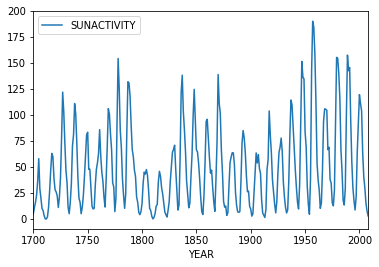

In [9]:
%matplotlib inline
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

#### Autocorrelation plot

Clearly there is a seasonal pattern in activity. If our aim was to fit a model to these data we would want to start looking at the **autocorrelation** and partial autocorrelation functions...

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


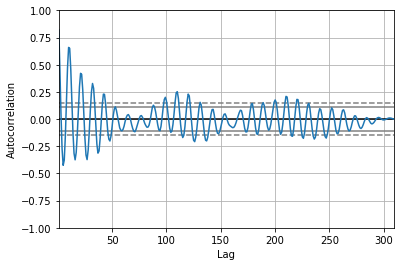

In [10]:
pd.tools.plotting.autocorrelation_plot(df['SUNACTIVITY'])

#### Periodogram

That the blue line goes beyond the horizontal grey lines indicates that this is a non-stationary time series with correlation structure. For my purposes here, I am not interested in fitting a model to the data. Instead, I just want to learn more about the length of the typical sunspot cycle. For this need it helps to view the time series' autocorrelation function in the _frequency_ domain instead of the temporal domain. So, we create an array of frequencies to evaluate the series over...

In [11]:
import numpy as np
N2 = df.shape[0] / 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:] #Nyquist range

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


...then, using these frequencies, plot the _periodogram_, which is the frequency domain analog of the autocorrelation plot above. Note that the [Lomb-Scargle method](http://en.wikipedia.org/wiki/Least-squares_spectral_analysis) used below assumes that the frequencies are not in a typical unit like Hertz (cycles per second) but rather as [angular frequencies](http://en.wikipedia.org/wiki/Angular_frequency), which is why we need to multiply the values by $2\pi$. (The Lomb-Scargle method is flexible in that the time series need not be uniformly sampled.)

If you do not have the scipy library installed, here is the command for installing it:

`sudo apt-get install python-numpy python-scipy python-matplotlib ipython ipython-notebook python-pandas python-sympy python-nose`

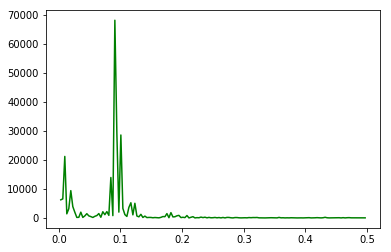

In [12]:
import scipy as sp
import matplotlib.pyplot as plt
periodogram = sp.signal.lombscargle(np.array(df['YEAR']), np.array(df['SUNACTIVITY']), freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

We see a big spike in the power of the series at a frequency of just below 0.1. Recall that these are yearly observations, so we can divide this frequency into 1 to get the period of each cycle...

In [15]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


The major cycle is about 11 years, which is what the literature states. So, we could have skipped this previous step entirely and just assumed the data had an 11 year cycle like the literature said, but it is always good to sanity check what you are working with, and of course, in many settings one does not already know such things, hence the need for exploration.

At this point, after a handful of lines of code and some internet searches we have a basic handle on:

* The data generating process
* Distributional information
* Temporal behavior

There are a lot of things we could dive into further, but now comes the question that ties back to the title of this post: was our basic line plot of the time series data as helpful as it could be? After all, we simply plotted the data using default settings with respect to plot window size and axes scaling.

## Optimizing aspect ratio: _"Banking to 45∘"_

In the following code segments we'll develop a method for finding _an_ optimal aspect ratio of the plot for the sunspots data (my use of the indefinite article rather than "the optimal" is purposeful: we just want to improve upon the default plot size and not necessarily find the truly best size). The code will follow the notation that Cleveland uses in the _The Details of Banking to 45$^\circ$_ section in [1].

**The basic rule of the _Banking to 45_ is that the average slope of the lines in the plot should be approximately 45 degrees.**

Below we show how to achieve that. While you are encouraged to understand the pieces of code below, our key focus is on the conceptThe first thing we do is set up the vertical and horizontal range of the data we'll be plotting...

In [16]:
v_data = df['SUNACTIVITY'].max() - df['SUNACTIVITY'].min()
h_data = df['YEAR'].max() - df['YEAR'].min()
v_data_diffs = df['SUNACTIVITY'].diff().apply(np.abs)
vbar_data_diffs = v_data_diffs / v_data    
h_data_diffs = df['YEAR'].diff().apply(np.abs)
hbar_data_diffs = h_data_diffs / h_data

Next, we'll define our objective function that we want to optimize. This function gets evaluated for each aspect ratio we want to test, and for each evaluation it calls a few supporting functions...

In [17]:
def objective_fcn(width_height, target):
    dev = setup_device_coords(figsize=width_height)
    lengths = segment_lengths(dev['aspect ratio'], dev['horizontal_device'])
    weighted_avg_banking =  np.sum(segment_orientations(dev['aspect ratio']) * lengths) / np.sum(lengths)  
    return np.abs(weighted_avg_banking - target)

The `setup_device_coords` function maps data coordinates to screen coordinates and calculates the vertical and horizontal range of the data in terms of their screen positions...

In [18]:
def setup_device_coords(figsize=(8,6)):
    h_device, v_device = figsize
    fig, ax = plot_sunspots(figsize)
    device_coords = [ax.transData.transform(data_coords) for data_coords in df.values]
    df_device = pd.DataFrame(device_coords, columns=['YEAR', 'SUNACTIVITY'])    
    v_device = df_device['SUNACTIVITY'].max() - df_device['SUNACTIVITY'].min()
    h_device = df_device['YEAR'].max() - df_device['YEAR'].min()
    aspect_ratio = v_device / h_device
    v_conversion = v_device / v_data  
    h_conversion = h_device / h_data
    fig.clear()
    return {'aspect ratio': aspect_ratio,
            'vertical_device': v_device,
            'horizontal_device': h_device,
            'vertical conversion': v_conversion,
            'horizontal conversion': h_conversion}

To do the data-to-screen conversion the `setup_device_coords` function calls a supporting function to render a plot of the data in device memory...

In [19]:
def plot_sunspots(figsize, color='blue'):
    fig = plt.figure(figsize=figsize)
    fig.canvas.set_window_title('%.1f by %.1f inch window' % (figsize[0], figsize[1]))
    ax1 = fig.add_subplot(111)
    df.plot(x='YEAR', y='SUNACTIVITY', ax=ax1, linewidth=2, color=color)
    fig.tight_layout()
    ax1.set_xlim(right=df['YEAR'].max())
    ax1.set_ylim(top=df['SUNACTIVITY'].max())
    ax1.set_ylabel('Observed Sunspots')
    ax1.set_title('Sunspot Activity Over Time')
    return (fig, ax1)

Back to the supporting functions called by `objective_fcn`, we need to deteremine the lengths and slopes of each line segment in a given plot. The banking method calculates the average orientation of the line segments, where the averaging is weighted by each line segment's length.

In [20]:
def segment_lengths(aspect_ratio, h_device):
    return h_device * np.sqrt(hbar_data_diffs.dropna()**2 + aspect_ratio**2 * vbar_data_diffs.dropna()**2)

In [21]:
def segment_orientations(aspect_ratio):
    return np.arctan(aspect_ratio * vbar_data_diffs / hbar_data_diffs)

With the objective function (and its supporting functions) defined, we now need a few lines of code to drive everything. We set our desired average banking of the line segments to be 45 degrees (although the algorithms work in units of radians) and then define a grid of possible plot sizes to evaluate the objective function over. Note that the optimization method is called `brute` for a reason: it is a just a brute-force scan of every possible plot size, where we have defined what is possible. Since I already have experience with these data I am limiting the search to be over plotting windows that are longer than they are tall, and I am only searching over $\frac{1}{2}$ inch step-sizes in the window dimensions because we are not interested in a super-precise solution. The last line of code unpacks a list of values returned in the `results` variable into individual variables that we can work with directly.

In [22]:
import scipy.optimize as spo
target = np.radians(45)   
slice_obj = np.s_[20:26:0.5, # widths
                  1:4:0.5]   # heights              
results = spo.brute(objective_fcn, slice_obj, args=[target], full_output=True, finish=None)
optimal_dims, objective_val, search_grid, objective_grid = results

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1440x72 with 0 Axes>

<Figure size 1440x72 with 0 Axes>

<Figure size 1440x108 with 0 Axes>

<Figure size 1440x144 with 0 Axes>

<Figure size 1440x180 with 0 Axes>

<Figure size 1440x216 with 0 Axes>

<Figure size 1440x252 with 0 Axes>

<Figure size 1476x72 with 0 Axes>

<Figure size 1476x108 with 0 Axes>

<Figure size 1476x144 with 0 Axes>

<Figure size 1476x180 with 0 Axes>

<Figure size 1476x216 with 0 Axes>

<Figure size 1476x252 with 0 Axes>

<Figure size 1512x72 with 0 Axes>

<Figure size 1512x108 with 0 Axes>

<Figure size 1512x144 with 0 Axes>

<Figure size 1512x180 with 0 Axes>

<Figure size 1512x216 with 0 Axes>

<Figure size 1512x252 with 0 Axes>

<Figure size 1548x72 with 0 Axes>

<Figure size 1548x108 with 0 Axes>

<Figure size 1548x144 with 0 Axes>

<Figure size 1548x180 with 0 Axes>

<Figure size 1548x216 with 0 Axes>

<Figure size 1548x252 with 0 Axes>

<Figure size 1584x72 with 0 Axes>

<Figure size 1584x108 with 0 Axes>

<Figure size 1584x144 with 0 Axes>

<Figure size 1584x180 with 0 Axes>

<Figure size 1584x216 with 0 Axes>

<Figure size 1584x252 with 0 Axes>

<Figure size 1620x72 with 0 Axes>

<Figure size 1620x108 with 0 Axes>

<Figure size 1620x144 with 0 Axes>

<Figure size 1620x180 with 0 Axes>

<Figure size 1620x216 with 0 Axes>

<Figure size 1620x252 with 0 Axes>

<Figure size 1656x72 with 0 Axes>

<Figure size 1656x108 with 0 Axes>

<Figure size 1656x144 with 0 Axes>

<Figure size 1656x180 with 0 Axes>

<Figure size 1656x216 with 0 Axes>

<Figure size 1656x252 with 0 Axes>

<Figure size 1692x72 with 0 Axes>

<Figure size 1692x108 with 0 Axes>

<Figure size 1692x144 with 0 Axes>

<Figure size 1692x180 with 0 Axes>

<Figure size 1692x216 with 0 Axes>

<Figure size 1692x252 with 0 Axes>

<Figure size 1728x72 with 0 Axes>

<Figure size 1728x108 with 0 Axes>

<Figure size 1728x144 with 0 Axes>

<Figure size 1728x180 with 0 Axes>

<Figure size 1728x216 with 0 Axes>

<Figure size 1728x252 with 0 Axes>

<Figure size 1764x72 with 0 Axes>

<Figure size 1764x108 with 0 Axes>

<Figure size 1764x144 with 0 Axes>

<Figure size 1764x180 with 0 Axes>

<Figure size 1764x216 with 0 Axes>

<Figure size 1764x252 with 0 Axes>

<Figure size 1800x72 with 0 Axes>

<Figure size 1800x108 with 0 Axes>

<Figure size 1800x144 with 0 Axes>

<Figure size 1800x180 with 0 Axes>

<Figure size 1800x216 with 0 Axes>

<Figure size 1800x252 with 0 Axes>

<Figure size 1836x72 with 0 Axes>

<Figure size 1836x108 with 0 Axes>

<Figure size 1836x144 with 0 Axes>

<Figure size 1836x180 with 0 Axes>

<Figure size 1836x216 with 0 Axes>

<Figure size 1836x252 with 0 Axes>

With the optimal plot size determined, let's compare how the time series plot looks using the default aspect ratio versus the optimized one...

In [27]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



Weighted-average banking using default 8 x 6 inch plot window: 87.3 degrees (goal is 45 degrees)


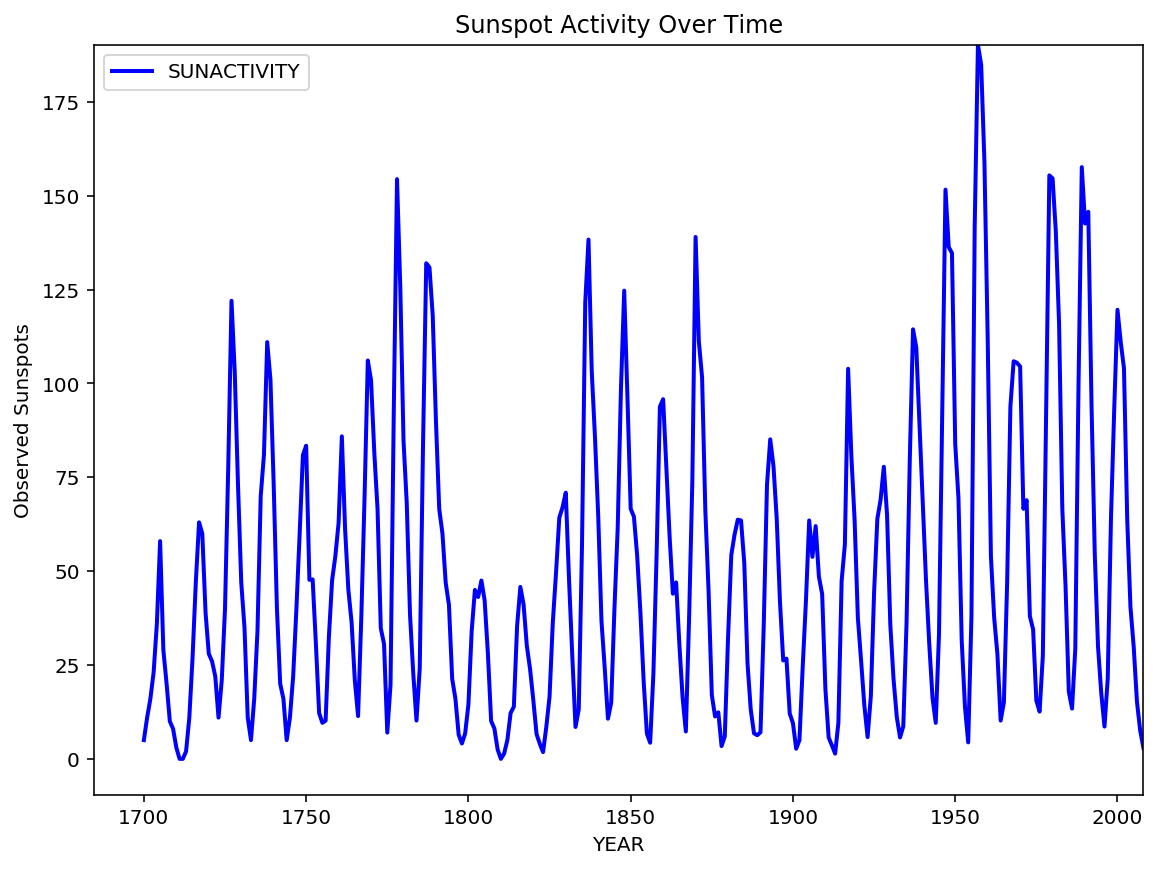

In [28]:
plt.close('all')
ax1 = plot_sunspots((8,6))
print('\n\nWeighted-average banking using default 8 x 6 inch plot window: 87.3 degrees (goal is 45 degrees)' )

This is the same plot we saw above, but bigger and with axes labels. The default aspect ratio leaves us with line segments that have an average orientation of _nearly vertical_, so this is a perfect example of the type of problem Cleveland was researching: It is very difficult to perceive patterns in the data when the rates of change over small chunks of time are so extreme. About all we can say is "there are cycles roughly every 10 years".

Now let's look at the same data plotted using an aspect ratio that makes the average line segment have an absolute orientation of 45 degrees...



Optimal width and height found to be 21.5 by 1.5 inches
Average banking interval at optimized aspect ratio: (44.92, 45.08)


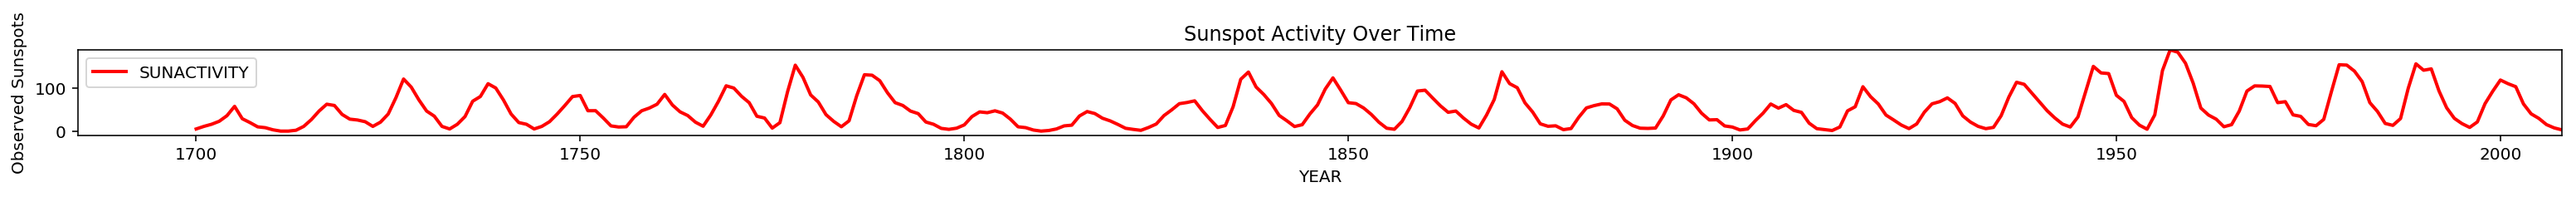

In [29]:
ax2 = plot_sunspots(optimal_dims, color='red')
print('\n\nOptimal width and height found to be %.1f by %.1f inches' % (optimal_dims[0], optimal_dims[1])    )
banking = [np.degrees(target - objective_val),
           np.degrees(target + objective_val)]    
print('Average banking interval at optimized aspect ratio: (%.2f, %.2f)' % (banking[0], banking[1]))

(When I run this same code on my laptop I get an optimal width of 22.5 inches by the same 1.5 inch height.)

Ah, now we see something **entirely new**: when there are large spikes in activity the ramp up period is asymmetric with the ramp down period. Specifically, activity ramps up very quickly and tapers off more gradually. In contrast, during weaker cycles the pattern is more symmetric. This nonlinear behavior is interesting and highly studied. But, we might never investigate further had we simply plotted the data in a naive way and moved on to something else.

## Lessons
1. Even the most pedestrian data task, like plotting an array of values, still requires careful thought if the aim is gaining insight. Without such thought it is remarkably easy to have one's work amount to little more than generating chart porn for PowerPoint decks

2. Default settings in visualization tools are there for expediency. We will encounter plenty of opportunities that warrant going beyond these _defaults_ to instead put _intention_ behind our graphical results

## Extensions

The exploration presented here was a quick first take and there a couple of places we could improve upon. First, the method that Cleveland developed ~ 20 years ago has seen extensions, such as [_multiscale banking_](http://vis.berkeley.edu/papers/banking/). Second, the optimization method was easy to use and understand, but a more general, faster-converging approach is certainly possible.

## About this post 

This [IPython Notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) was created by By [Josh Hemann](http://ficolabsblog.fico.com/josh-hemann.html). 

## References

[1] _The Elements of Graphing Data_, William S. Cleveland, Hobart Press, Summit, New Jersey, 1994
    ISBN: 0-9634884-1-4     
[2] _IPython: A System for Interactive Scientific Computing_, Fernando Pérez, Brian E. Granger, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org